In [2]:

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'  #%%
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
import textwrap
import matplotlib

plt.rcParams.update(matplotlib.rcParamsDefault)
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]

semi_balck = '#4F6272'

In [3]:
results_path = "/Volumes/noamaz/modularity/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/all_togther"

In [24]:
task = "retina_xor"
num_layers = '3'
retina_res_folder = f"{task}/retina_{num_layers}_layers"
retina_lgb_res_path = f"{results_path}/{retina_res_folder}/lightgbm_feature_selection/exp_2023-11-27-15-51-15_nice_features"
retina_first_analsis_res_folder = f"{results_path}/{retina_res_folder}/first_analysis_results"
retina_first_analsis_file_name = f"2023-10-24-10-00-54_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"
retina_first_analsis = pd.read_csv(f"{retina_first_analsis_res_folder}/{retina_first_analsis_file_name}").sort_values('mean_performance', ascending=False)
task = "xor"
num_layers = "4"
xor_res_folder = f"{task}/{task}_{num_layers}_layers"
xor_lgb_res_path = f"{results_path}/{xor_res_folder}/lightgbm_feature_selection/exp_2023-11-16-17-38-02_nice_features"
xor_first_analsis_res_folder = f"{results_path}/{xor_res_folder}/first_analysis_results"
xor_first_analsis_file_name = "2023-11-16-14-52-18_all_results_from_teach_archs_results_with_motifs_5000_ep_no_duplicates.csv"
xor_first_analsis = pd.read_csv(f"{xor_first_analsis_res_folder}/{xor_first_analsis_file_name}").sort_values('mean_performance', ascending=False)

task = "digits"
num_layers = '3'
digit_res_folder = f"{task}/digits_{num_layers}_layers"
digit_lgb_res_path = f"{results_path}/{digit_res_folder}/lightgbm_feature_selection/exp_2023_11_27_11_00_0_nice_features"
digit_first_analsis_res_folder = f"{results_path}/{digit_res_folder}/first_analysis_results"
digit_first_analsis_file_name = "2023-11-26-13-45-59_all_results_from_teach_archs_results_with_motifs_1000_ep_no_duplicates_fixed.csv"
digit_first_analsis = pd.read_csv(f"{digit_first_analsis_res_folder}/{digit_first_analsis_file_name}").sort_values('mean_performance', ascending=False)


In [25]:
all_features_names =  {
    'connectivity_ratio': 'Density',
        'num_connections': "Number of synapses in the network",
        'motifs_count_0': "Number of type III motifs",
        'motifs_count_1': "Number of type I motifs",
        'motifs_count_2': "Number of type II motifs",
    }

In [36]:
all_features_names.values()

dict_values(['Density', 'Number of synapses in the network', 'Number of type III motifs', 'Number of type I motifs', 'Number of type II motifs'])

In [26]:
retina_task = 'retina_xor'
ret_all_f_names = pd.read_csv(f"{results_path}/{retina_res_folder}/all_feature_names.csv")['0'].tolist()
ret_single_feature_path = f"{results_path}/{retina_res_folder}/single_feature_prediction/"
ret_single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(ret_single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{ret_single_feature_path}/{file_name}")
    feature_ind = int(file_name.split('feature_')[1].split('_best.csv')[0]) - 1
    temp['feature_ind'] = feature_ind
    feature_name = ret_all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    ret_single_feature_baseline_res = pd.concat([ret_single_feature_baseline_res, temp], ignore_index=True)
xor_task = 'xor'
xor_all_f_names = pd.read_csv(f"{results_path}/{xor_res_folder}/all_feature_names.csv")['0'].tolist()
xor_single_feature_path = f"{results_path}/{xor_res_folder}/single_feature_prediction/"
xor_single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(xor_single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{xor_single_feature_path}/{file_name}")
    feature_ind = int(file_name.split('feature_')[1].split('_best.csv')[0]) - 1
    temp['feature_ind'] = feature_ind
    feature_name = xor_all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    xor_single_feature_baseline_res = pd.concat([xor_single_feature_baseline_res, temp], ignore_index=True)
dig_task = 'digits'
dig_all_f_names = pd.read_csv(f"{results_path}/{digit_res_folder}/all_feature_names.csv")['0'].tolist()
dig_single_feature_path = f"{results_path}/{digit_res_folder}/single_feature_prediction/"
dig_single_feature_baseline_res = pd.DataFrame()
for file_name in os.listdir(dig_single_feature_path):
    if '_best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{dig_single_feature_path}/{file_name}")
    feature_ind = int(file_name.split('feature_')[1].split('_best.csv')[0]) - 1
    temp['feature_ind'] = feature_ind
    feature_name = dig_all_f_names[feature_ind]
    temp['feature_name'] = feature_name
    dig_single_feature_baseline_res = pd.concat([dig_single_feature_baseline_res, temp], ignore_index=True)

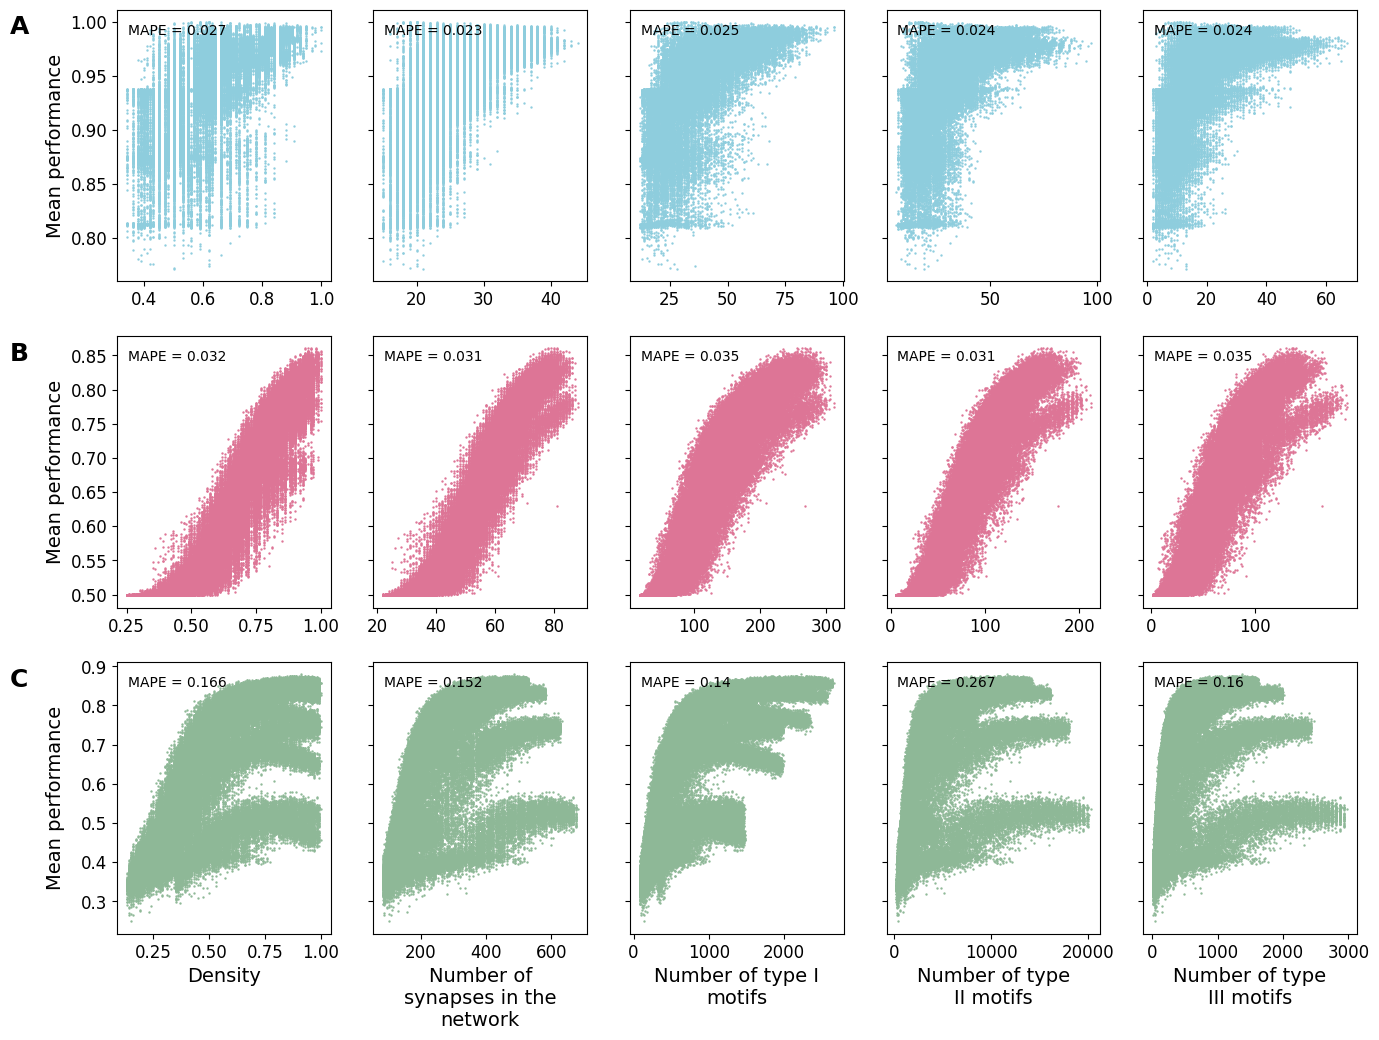

In [81]:
fig, axs = plt.subplots(3, 5, figsize=(16, 12), sharey='row', )
ind_r, ind_c = axs.shape
cs = [
     "#8ECDDD", COLORS[2], COLORS[3], semi_balck
]
nums = ['A', 'B', 'C']
tasks = ['Digit recognition', 'XOR', 'Retina']
cols = ['connectivity_ratio', 'num_connections', 'motifs_count_1', 'motifs_count_2', 'motifs_count_0']
data = [retina_first_analsis, xor_first_analsis, digit_first_analsis]
single_features = [
    ret_single_feature_baseline_res,
    xor_single_feature_baseline_res,
    dig_single_feature_baseline_res,
]
gbts = [0.0187454134649795, 0.0191613554248621 , 0.0243257797442924]
for i in range(ind_r):
    if i !=3:
        for j in range(ind_c):
            feature_name = cols[j]
            x_data = data[i][feature_name]
            textstr = f"MAPE = {round(single_features[i]['best mape test'][single_features[i]['feature_name']==feature_name].item(), 3)}"
            feature_name = all_features_names[feature_name]
            axs[i, j].scatter(x_data, data[i]['mean_performance'], c=cs[i], s=0.5)
            axs[i, j].text(0.05, 0.95, textstr, transform=axs[i, j].transAxes, fontsize=10,                   verticalalignment='top', )
            if i==2:
                axs[i, j].set_xlabel(textwrap.fill(feature_name.replace('_', ' '), width=16,
                                               break_long_words=False), fontsize=14)
            if j ==0:
                axs[i, j].text(-0.5, 0.98, nums[i], transform=axs[i, j].transAxes, fontsize=18, verticalalignment='top', weight="bold")
                axs[i, j].set_ylabel(textwrap.fill('Mean performance', width=16,
                                               break_long_words=False), fontsize=14)

            axs[i, j].tick_params(axis='both', labelsize=12)
            fig.align_ylabels(axs[j:])
plt.savefig(
    f"{plot_path}/all_informative_features_values_.png", bbox_inches='tight')

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

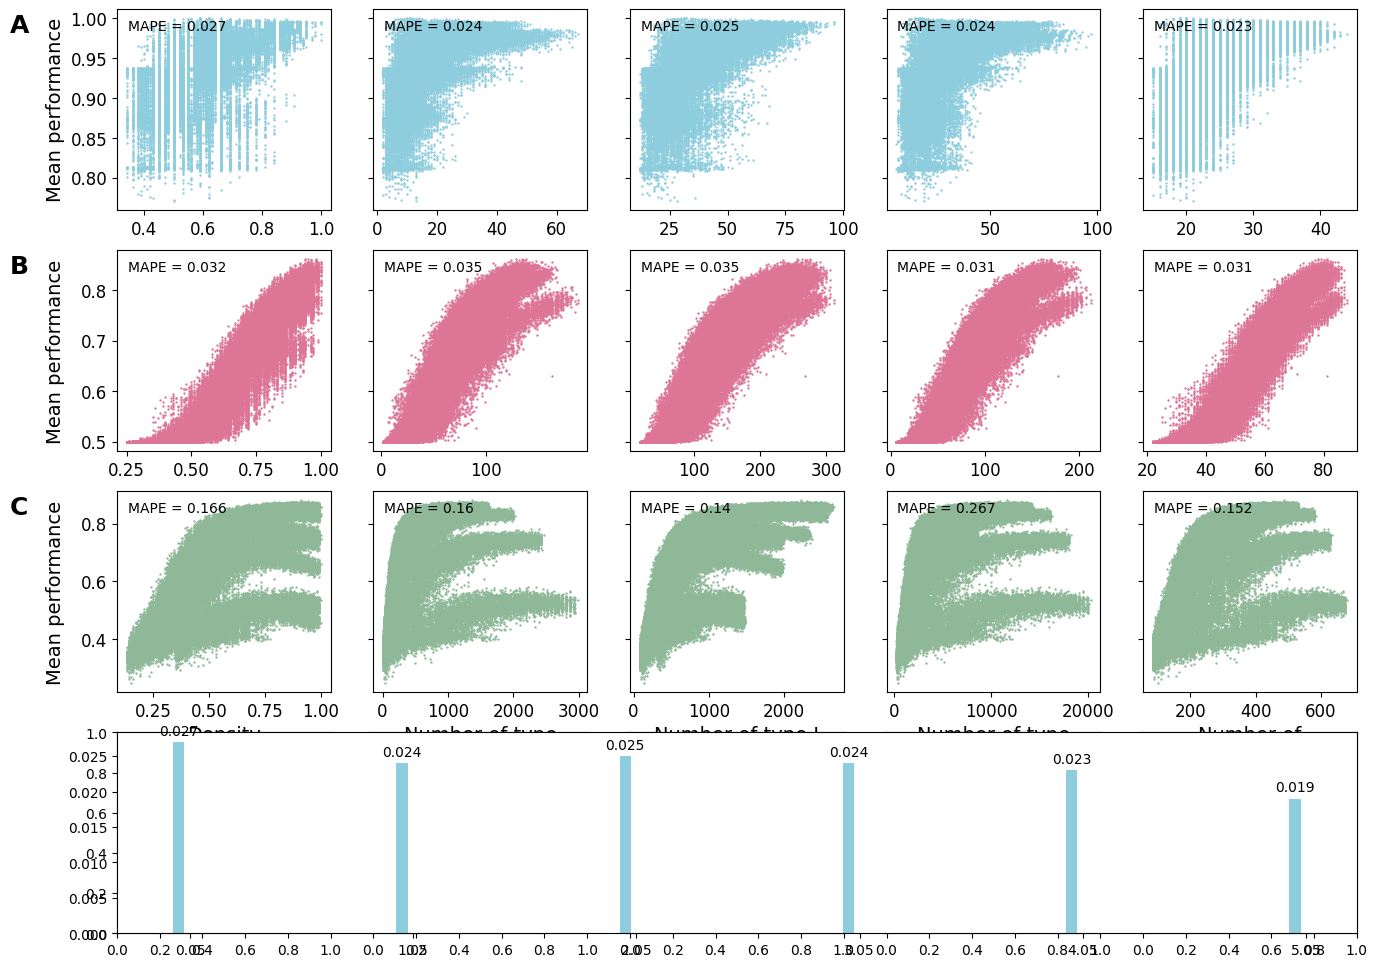

In [76]:
fig, axs = plt.subplots(4, 5, figsize=(16, 12), sharey='row', )
ind_r, ind_c = axs.shape
cs = [
     "#8ECDDD", COLORS[2], COLORS[3], semi_balck
]
nums = ['A', 'B', 'C']
tasks = ['Digit recognition', 'XOR', 'Retina']
cols = ['connectivity_ratio' , 'motifs_count_0', 'motifs_count_1', 'motifs_count_2', 'num_connections']
data = [retina_first_analsis, xor_first_analsis, digit_first_analsis]
single_features = [
    ret_single_feature_baseline_res,
    xor_single_feature_baseline_res,
    dig_single_feature_baseline_res,
]
gbts = [0.0187454134649795, 0.0191613554248621 , 0.0243257797442924]
for i in range(ind_r):
    if i !=3:
        for j in range(ind_c):
            feature_name = cols[j]
            x_data = data[i][feature_name]
            textstr = f"MAPE = {round(single_features[i]['best mape test'][single_features[i]['feature_name']==feature_name].item(), 3)}"
            feature_name = all_features_names[feature_name]
            axs[i, j].scatter(x_data, data[i]['mean_performance'], c=cs[i], s=0.5)
            axs[i, j].text(0.05, 0.95, textstr, transform=axs[i, j].transAxes, fontsize=10,                   verticalalignment='top', )
            if i==2:
                axs[i, j].set_xlabel(textwrap.fill(feature_name.replace('_', ' '), width=16,
                                               break_long_words=False), fontsize=14)
            if j ==0:
                axs[i, j].text(-0.5, 0.98, nums[i], transform=axs[i, j].transAxes, fontsize=18, verticalalignment='top', weight="bold")
                axs[i, j].set_ylabel(textwrap.fill('Mean performance', width=16,
                                               break_long_words=False), fontsize=14)

            axs[i, j].tick_params(axis='both', labelsize=12)
            fig.align_ylabels(axs[j:])
ax0 = fig.add_subplot(414)
maps = []
width = 0.05  # the width of the bars
multiplier = 0
maps = {
                i:[ round(s['best mape test'][s['feature_name']==feature_name].item(), 3) for feature_name in cols]
                 for i, s in enumerate(single_features)
}
for i in maps:
for i, m in enumerate(maps.values()):
    x = np.arange(5)
    offset = width * multiplier
    rects = ax0.bar(x + offset, m, width, color=cs[i])
    multiplier += 1
    ax0.bar_label(rects, padding=3)
    ax0.set_xticks(x + width, all_features_names.keys())
plt.savefig(
    f"{plot_path}/{time_str}_informative_features_values_.png", bbox_inches='tight')


In [73]:
maps

{0: [0.027, 0.024, 0.025, 0.024, 0.023, 0.0187454134649795],
 1: [0.032, 0.035, 0.035, 0.031, 0.031, 0.0191613554248621],
 2: [0.166, 0.16, 0.14, 0.267, 0.152, 0.0243257797442924]}

In [65]:
maps

{0: <generator object <dictcomp>.<genexpr> at 0x7fdc55b096d0>,
 1: <generator object <dictcomp>.<genexpr> at 0x7fdc55b09ac0>,
 2: <generator object <dictcomp>.<genexpr> at 0x7fdc55b09970>}

In [ ]:
gbts = [0.0187454134649795, 0.0191613554248621 , 0.0243257797442924]


In [29]:
single_features[i]

0     0.036937
1     0.027898
2     0.024628
3     0.036769
4     0.953079
        ...   
67    0.033459
68    0.953079
69    0.039187
70    0.037511
71    0.036857
Name: best mape test, Length: 72, dtype: float64

In [55]:
import numpy as np